In [1]:
# !pip install nbconvert[webpdf]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
global_temp_country = pd.read_csv('C:/Users/beemu/Downloads/GlobalLandTemperaturesByCountry.csv')
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
global_temp_country.shape

(577462, 4)

### Cleaning the data set

In [5]:
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [6]:
# Drop the missing data
global_temp_country.dropna(axis='index',how='any', subset=['AverageTemperature'],inplace=True)
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [7]:
pd.set_option('display.max_rows',243)
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Bahrain                                      25.930809
Ba

###  checking whether there is a duplicate value in country or not

In [8]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [9]:
dict={'Denmark (Europe)':'Denmark',
      'France (Europe)':'France',
      'Netherlands (Europe)':'Netherlands',
      'United Kingdom (Europe)':'United Kingdom',
     'Congo (Democratic Republic Of The)':'Congo'}

In [10]:
global_temp_country['Country']=global_temp_country['Country'].replace(dict)

In [11]:
global_temp_country['Country'].nunique()

237

### Calculating the average temperature for each country

In [12]:
pd.set_option('display.max_rows',243)
avg_temp=global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
avg_temp.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [13]:
#!pip install plotly
#!pip install chart_studio

In [14]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)


In [15]:
fig = px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth Map of AverageTemperature ',template="plotly_dark")
fig.show()

###  Sorting the countries by the average temperature and plot Horizontal Bar

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

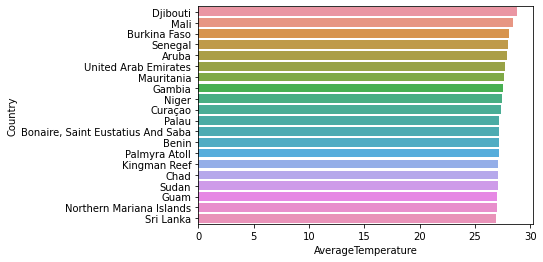

In [16]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

## 3) Is there a global warming?

    Let's read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [17]:
global_temp = pd.read_csv('C:/Users/beemu/Downloads/GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
global_temp['dt'][0].split('-')[0]

'1750'

In [19]:
def fetch_year(date):
    return date.split('-')[0]

In [20]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [21]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [22]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [23]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['Uncertainty bottom']=data['LandAverageTemperature']- data['LandAverageTemperatureUncertainty']

In [24]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [25]:
import plotly.express as px
fig=px.line(data,x="years",y=["Uncertainty top","Uncertainty bottom","LandAverageTemperature"],title="Average Land Temperature in World",template="plotly_dark")
fig.show()

    From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

## Analyse Trend In Temperatures for the Top Economies

    Let’s look at the chart of annual temperature changes in certain continents (we take into consideration one country per continent and mark Greenland as the coldest place on Earth).

In [26]:
continent = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [27]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [28]:
global_temp_country[global_temp_country['Country'].isin(continent)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [29]:
continent_df=global_temp_country[global_temp_country['Country'].isin(continent)]

In [30]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [31]:
continent_df.shape

(13598, 4)

In [32]:
continent_df['years']=continent_df['dt'].apply(fetch_year)

In [33]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [34]:
continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'})

AverageTemperature
years Country                          
1768  United States            5.572750
1769  United States           10.446500
1774  United States            1.603000
1775  United States            9.499167
1776  United States            8.110000
...                                 ...
2013  China                    9.295000
      India                   25.413250
      Japan                   12.964750
      Russia                  -2.263125
      United States           11.297111

[1148 rows x 1 columns]

In [35]:
avg_temp=continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'}).reset_index()
avg_temp.head(10)

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000
5,1777,United States,8.304750
6,1778,United States,5.362000
7,1779,United States,-0.713667
8,1781,United States,6.253250
9,1782,United States,7.606429


In [36]:
import plotly.express as px
fig=px.line(avg_temp,x="years",y=["AverageTemperature"],color='Country',title="Average Land Temperature in World",template="plotly_dark")
fig.show()

### Conclusion-->> We will see that  there has been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind. 

## Analyse Average Temperature Of Major Zimbabwean Cities By Month

In [37]:
cities=pd.read_csv('C:/Users/beemu/Downloads/GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [38]:
cities.shape

(8599212, 7)

In [39]:
zim=cities[cities['Country']=='Zimbabwe']

In [40]:
zim['City'].unique()

array(['Bulawayo', 'Chitungwiza', 'Gweru', 'Harare', 'Kadoma', 'Kwekwe',
       'Mutare'], dtype=object)

In [41]:
Cities=['Bulawayo', 'Chitungwiza', 'Gweru', 'Harare', 'Kadoma', 'Kwekwe',
       'Mutare']

In [42]:
cities=zim[zim['City'].isin(Cities)]

In [43]:
cities.shape

(13755, 7)

In [44]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1204125,1850-01-01,21.047,1.729,Bulawayo,Zimbabwe,20.09S,29.00E
1204126,1850-02-01,22.329,1.811,Bulawayo,Zimbabwe,20.09S,29.00E
1204127,1850-03-01,21.082,2.273,Bulawayo,Zimbabwe,20.09S,29.00E
1204128,1850-04-01,18.458,1.937,Bulawayo,Zimbabwe,20.09S,29.00E
1204129,1850-05-01,15.542,1.664,Bulawayo,Zimbabwe,20.09S,29.00E


In [45]:
## remove N & E from lat & Lon
cities['Latitude']=cities['Latitude'].str.strip('S')
cities['Longitude']=cities['Longitude'].str.strip('E')

In [46]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1204125,1850-01-01,21.047,1.729,Bulawayo,Zimbabwe,20.09,29.00
1204126,1850-02-01,22.329,1.811,Bulawayo,Zimbabwe,20.09,29.00
1204127,1850-03-01,21.082,2.273,Bulawayo,Zimbabwe,20.09,29.00
1204128,1850-04-01,18.458,1.937,Bulawayo,Zimbabwe,20.09,29.00
1204129,1850-05-01,15.542,1.664,Bulawayo,Zimbabwe,20.09,29.00


In [58]:
cities['dt']=pd.to_datetime(cities['dt'])

In [59]:
cities['Month']=cities['dt'].dt.month
cities.drop('dt',axis=1,inplace=True)

In [60]:
cities.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
1204125,21.047,1.729,Bulawayo,Zimbabwe,20.09,29.00,1
1204126,22.329,1.811,Bulawayo,Zimbabwe,20.09,29.00,2
1204127,21.082,2.273,Bulawayo,Zimbabwe,20.09,29.00,3
1204128,18.458,1.937,Bulawayo,Zimbabwe,20.09,29.00,4
1204129,15.542,1.664,Bulawayo,Zimbabwe,20.09,29.00,5


In [61]:
cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame()

AverageTemperature
Month City                           
1     Bulawayo              22.383918
      Chitungwiza           22.050872
      Gweru                 22.383918
      Harare                22.050872
      Kadoma                22.050872
      Kwekwe                22.050872
      Mutare                21.001333
2     Bulawayo              22.078766
      Chitungwiza           22.068695
      Gweru                 22.078766
      Harare                22.068695
      Kadoma                22.068695
      Kwekwe                22.068695
      Mutare                20.874702
3     Bulawayo              21.323000
      Chitungwiza           21.723241
      Gweru                 21.323000
      Harare                21.723241
      Kadoma                21.723241
      Kwekwe                21.723241
      Mutare                20.253539
4     Bulawayo              19.493956
      Chitungwiza           20.195170
      Gweru                 19.493956
      Harare                20.195170
      Kadoma                20.195170
      Kwekwe                20.195170
      Mutare                18.550113
5     Bulawayo              17.001608
      Chitungwiza           17.880149
      Gweru                 17.001608
      Harare                17.880149
      Kadoma                17.880149
      Kwekwe                17.880149
      Mutare                16.183993
6     Bulawayo              14.592646
      Chitungwiza           15.621745
      Gweru                 14.592646
      Harare                15.621745
      Kadoma                15.621745
      Kwekwe                15.621745
      Mutare                13.912291
7     Bulawayo              14.448038
      Chitungwiza           15.356366
      Gweru                 14.448038
      Harare                15.356366
      Kadoma                15.356366
      Kwekwe                15.356366
      Mutare                13.603549
8     Bulawayo              16.891376
      Chitungwiza           17.656071
      Gweru                 16.891376
      Harare                17.656071
      Kadoma                17.656071
      Kwekwe                17.656071
      Mutare                15.781716
9     Bulawayo              20.425239
      Chitungwiza           21.192214
      Gweru                 20.425239
      Harare                21.192214
      Kadoma                21.192214
      Kwekwe                21.192214
      Mutare                19.047993
10    Bulawayo              22.604481
      Chitungwiza           23.356336
      Gweru                 22.604481
      Harare                23.356336
      Kadoma                23.356336
      Kwekwe                23.356336
      Mutare                21.122514
11    Bulawayo              22.891750
      Chitungwiza           23.278504
      Gweru                 22.891750
      Harare                23.278504
      Kadoma                23.278504
      Kwekwe                23.278504
      Mutare                21.495035
12    Bulawayo              22.393032
      Chitungwiza           22.192536
      Gweru                 22.393032
      Harare                22.192536
      Kadoma                22.192536
      Kwekwe                22.192536
      Mutare                20.932707

In [62]:
cities_temp=cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame().reset_index()
cities_temp.columns=['month','City','Mean_temp']
cities_temp.head()

,month,City,Mean_temp
0,1,Bulawayo,22.383918
1,1,Chitungwiza,22.050872
2,1,Gweru,22.383918
3,1,Harare,22.050872
4,1,Kadoma,22.050872


In [63]:
df=cities_temp.merge(cities,on='City',how='left')
df.head()

,month,City,Mean_temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bulawayo,22.383918,21.047,1.729,Zimbabwe,20.09,29.00,1
1,1,Bulawayo,22.383918,22.329,1.811,Zimbabwe,20.09,29.00,2
2,1,Bulawayo,22.383918,21.082,2.273,Zimbabwe,20.09,29.00,3
3,1,Bulawayo,22.383918,18.458,1.937,Zimbabwe,20.09,29.00,4
4,1,Bulawayo,22.383918,15.542,1.664,Zimbabwe,20.09,29.00,5


In [64]:
data=df.drop_duplicates(subset=['month','City'])

In [65]:
data.head()

,month,City,Mean_temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bulawayo,22.383918,21.047,1.729,Zimbabwe,20.09,29.00,1
1965,1,Chitungwiza,22.050872,20.699,1.552,Zimbabwe,18.48,30.42,1
3930,1,Gweru,22.383918,21.047,1.729,Zimbabwe,20.09,29.00,1
5895,1,Harare,22.050872,20.699,1.552,Zimbabwe,18.48,30.42,1
7860,1,Kadoma,22.050872,20.699,1.552,Zimbabwe,18.48,30.42,1


In [66]:
data2=data[['month','City','Mean_temp','Country','Latitude','Longitude']]
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bulawayo,22.383918,Zimbabwe,20.09,29.00
1965,1,Chitungwiza,22.050872,Zimbabwe,18.48,30.42
3930,1,Gweru,22.383918,Zimbabwe,20.09,29.00
5895,1,Harare,22.050872,Zimbabwe,18.48,30.42
7860,1,Kadoma,22.050872,Zimbabwe,18.48,30.42


In [68]:
trace = go.Heatmap(z=data2['Mean_temp'],
                   x=data2['month'],
                   y=data2['City'],
                  colorscale='Viridis')

In [69]:
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)

In [70]:
fig = go.Figure(data=data, layout=layout)
fig.show()

## lets try to visualise temperature on a Map

In [71]:
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bulawayo,22.383918,Zimbabwe,20.09,29.00
1965,1,Chitungwiza,22.050872,Zimbabwe,18.48,30.42
3930,1,Gweru,22.383918,Zimbabwe,20.09,29.00
5895,1,Harare,22.050872,Zimbabwe,18.48,30.42
7860,1,Kadoma,22.050872,Zimbabwe,18.48,30.42


In [72]:
data2.shape

(84, 6)

In [73]:
import folium
# Create a map
m = folium.Map(tiles='openstreetmap', zoom_start=2)

In [74]:
# Add points to the map
for id,row in data2.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Mean_temp']).add_to(m)

# Display the map
m